In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import statistics
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import Perceptron
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv("dataset_comb.csv")
df = df.sample(frac = 1)
df.columns

Index(['id', 'Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity',
       'ConvexArea', 'EquivDiameter', 'Extent', 'Perimeter', 'Roundness',
       'AspectRation', 'Class'],
      dtype='object')

In [3]:
df = df.drop(['id'], axis = 1)
df['Class'].value_counts()


jasmine    9985
Gonen      8200
Name: Class, dtype: int64

In [4]:
# Jasmine - 0 , Gonen - 1
for column in df.columns:
    if column!='Class':
        colmax = df[column].max()
        colmin = df[column].min()
        for val in df[column]:
            val1 = (colmax - val)/(colmax - colmin)
            df[column] = df[column].replace(val, val1)
    elif column == 'Class':
        for val in df[column]:
            if val == 'jasmine':
                df[column] = df[column].replace(val, 0)
            elif val == 'Gonen':
                df[column] = df[column].replace(val, 1)


In [5]:
data = df.to_numpy()
data.shape

(18185, 11)

In [6]:
data_g = np.array_split(data, 7)

In [7]:
# FLD

accuracy_fl_test = []
accuracy_fl_train = []

for i in range(7):
    test_data = data_g[i]
    test_data_x = []
    test_data_y = []
    train_data_x = []
    train_data_y = []
    for j in range(7):
        if j!=i:      #creating training dataset
            for w in range(len(data_g[j])):
                train_data_x.append(data_g[j][w][:10])
                train_data_y.append(data_g[j][w][10])
        elif j == i:      #creating testing dataset
            for w in range(len(data_g[j])):
                test_data_x.append(data_g[j][w][:10])
                test_data_y.append(data_g[j][w][10])
                
    #convert into array
    test_data_xn = np.array(test_data_x)
    train_data_xn = np.array(train_data_x)
    test_data_yn = np.array(test_data_y)
    train_data_yn = np.array(train_data_y)
    
    #importing model from sklearn
    clf = LinearDiscriminantAnalysis()
    clf.fit(train_data_xn, train_data_yn)
    
    #predict class
    test_pred_y_fl = clf.predict(test_data_xn)
    train_pred_y_fl = clf.predict(train_data_xn)
    
    #calculating and appending accuracies
    acc1_fl = accuracy_score(test_data_yn, test_pred_y_fl)
    accuracy_fl_test.append(acc1_fl)
    
    acc2_fl = accuracy_score(train_data_yn, train_pred_y_fl)
    accuracy_fl_train.append(acc2_fl)

print(accuracy_fl_test)
print(accuracy_fl_train)
print("Mean accuracy for test set = ", statistics.mean(accuracy_fl_test))
print("Mean accuracy for train set = ", statistics.mean(accuracy_fl_train))

[0.9869130100076983, 0.9846035411855273, 0.9811393379522709, 0.9799846035411856, 0.9822940723633564, 0.9822940723633564, 0.980361956103196]
[0.9815230640918714, 0.9821004683390004, 0.9824212484762943, 0.9826778725861295, 0.9823570924488356, 0.9826137165586707, 0.9826148319219913]
Mean accuracy for test set =  0.9825129419309415
Mean accuracy for train set =  0.9823297563461133


In [8]:
# Perceptron

accuracy_lp_test = []
accuracy_lp_train = []

for i in range(7):
    test_data = data_g[i]
    test_data_x = []
    test_data_y = []
    train_data_x = []
    train_data_y = []
    for j in range(7):
        if j!=i:      #creating training dataset
            for w in range(len(data_g[j])):
                train_data_x.append(data_g[j][w][:10])
                train_data_y.append(data_g[j][w][10])
        elif j == i:      #creating testing dataset
            for w in range(len(data_g[j])):
                test_data_x.append(data_g[j][w][:10])
                test_data_y.append(data_g[j][w][10])

    #convert into array  
    test_data_xn = np.array(test_data_x)
    train_data_xn = np.array(train_data_x)
    test_data_yn = np.array(test_data_y)
    train_data_yn = np.array(train_data_y)
    
    #importing model from sklearn
    clf = Perceptron(tol = 1e-3, random_state=0)
    clf.fit(train_data_xn, train_data_yn)
    
    #predict class
    test_pred_y_lp = clf.predict(test_data_xn)
    train_pred_y_lp = clf.predict(train_data_xn)
    
    #calculating and appending accuracies
    acc1_lp = accuracy_score(test_data_yn, test_pred_y_lp)
    accuracy_lp_test.append(acc1_lp)
    
    acc2_lp = accuracy_score(train_data_yn, train_pred_y_lp)
    accuracy_lp_train.append(acc2_lp)

    
print(accuracy_lp_test)
print(accuracy_lp_train)
print("Mean accuracy for test set = ", statistics.mean(accuracy_lp_test))
print("Mean accuracy for train set = ", statistics.mean(accuracy_lp_train))

[0.99153194765204, 0.9849884526558892, 0.9799846035411856, 0.985373364126251, 0.9826789838337182, 0.9838337182448037, 0.9761262995764344]
[0.9873612625906204, 0.9823570924488356, 0.9821004683390004, 0.9873612625906204, 0.9847308654648104, 0.9817796882017066, 0.9803053630998204]
Mean accuracy for test set =  0.9835024813757602
Mean accuracy for train set =  0.9837137146764877


In [9]:
# Naive Bayes

accuracy_nb_test = []
accuracy_nb_train = []

for i in range(7):
    test_data = data_g[i]
    test_data_x = []
    test_data_y = []
    train_data_x = []
    train_data_y = []
    for j in range(7):
        if j!=i:      #creating training dataset
            for w in range(len(data_g[j])):
                train_data_x.append(data_g[j][w][:10])
                train_data_y.append(data_g[j][w][10])
        elif j == i:      #creating testing dataset
            for w in range(len(data_g[j])):
                test_data_x.append(data_g[j][w][:10])
                test_data_y.append(data_g[j][w][10])
       
    #convert into array         
    test_data_xn = np.array(test_data_x)
    train_data_xn = np.array(train_data_x)
    test_data_yn = np.array(test_data_y)
    train_data_yn = np.array(train_data_y)
    
    #importing model from sklearn
    clf = GaussianNB()
    clf.fit(train_data_xn, train_data_yn)
    
    #predict class
    test_pred_y_nb = clf.predict(test_data_xn)
    train_pred_y_nb = clf.predict(train_data_xn)

    #calculating and appending accuracies
    acc1_nb = accuracy_score(test_data_yn, test_pred_y_nb)
    accuracy_nb_test.append(acc1_nb)
    
    acc2_nb = accuracy_score(train_data_yn, train_pred_y_nb)
    accuracy_nb_train.append(acc2_nb)


print(accuracy_nb_test)
print(accuracy_nb_train)
print("Mean accuracy for test set = ", statistics.mean(accuracy_nb_test))
print("Mean accuracy for train set = ", statistics.mean(accuracy_nb_train))

[0.9888375673595073, 0.9872979214780601, 0.9857582755966128, 0.9807544264819091, 0.9842186297151655, 0.9861431870669746, 0.9853677319984597]
[0.9851799576570219, 0.984859177519728, 0.9856932058766921, 0.9861422980689035, 0.9857573619041509, 0.9855007377943158, 0.985501667949705]
Mean accuracy for test set =  0.9854825342423842
Mean accuracy for train set =  0.9855192009672167


In [10]:
# Logistic Regression

accuracy_log_test = []
accuracy_log_train = []

for i in range(7):
    test_data = data_g[i]
    test_data_x = []
    test_data_y = []
    train_data_x = []
    train_data_y = []
    for j in range(7):
        if j!=i:      #creating training dataset
            for w in range(len(data_g[j])):
                train_data_x.append(data_g[j][w][:10])
                train_data_y.append(data_g[j][w][10])
        elif j == i:      #creating testing dataset
            for w in range(len(data_g[j])):
                test_data_x.append(data_g[j][w][:10])
                test_data_y.append(data_g[j][w][10])
                
    #convert into array
    test_data_xn = np.array(test_data_x)
    train_data_xn = np.array(train_data_x)
    test_data_yn = np.array(test_data_y)
    train_data_yn = np.array(train_data_y)
    
    #importing model from sklearn 
    clf = LogisticRegression(random_state = 0)
    clf.fit(train_data_xn, train_data_yn)
    
    #predict class
    test_pred_y_log = clf.predict(test_data_xn)
    train_pred_y_log = clf.predict(train_data_xn)
    
    #calculating and appending accuracies
    acc1_log = accuracy_score(test_data_yn, test_pred_y_log)
    accuracy_log_test.append(acc1_log)
    
    acc2_log = accuracy_score(train_data_yn, train_pred_y_log)
    accuracy_log_train.append(acc2_log)

print(accuracy_log_test)
print(accuracy_log_train)
print("Mean accuracy for test set = ", statistics.mean(accuracy_log_test))
print("Mean accuracy for train set = ", statistics.mean(accuracy_log_train))

[0.9899923017705927, 0.9896073903002309, 0.9849884526558892, 0.9857582755966128, 0.9861431870669746, 0.9861431870669746, 0.9876780901039661]
[0.986912170398409, 0.9867838583434914, 0.9873612625906204, 0.9874254186180792, 0.9872329505357028, 0.9874254186180792, 0.9870413138311521]
Mean accuracy for test set =  0.9871872692230345
Mean accuracy for train set =  0.9871689132765049


In [11]:
# SVM

accuracy_svm_test = []
accuracy_svm_train = []

for i in range(7):
    test_data = data_g[i]
    test_data_x = []
    test_data_y = []
    train_data_x = []
    train_data_y = []
    for j in range(7):
        if j!=i:      #creating training dataset
            for w in range(len(data_g[j])):
                train_data_x.append(data_g[j][w][:10])
                train_data_y.append(data_g[j][w][10])
        elif j == i:      #creating testing dataset
            for w in range(len(data_g[j])):
                test_data_x.append(data_g[j][w][:10])
                test_data_y.append(data_g[j][w][10])
                
    #convert into array
    test_data_xn = np.array(test_data_x)
    train_data_xn = np.array(train_data_x)
    test_data_yn = np.array(test_data_y)
    train_data_yn = np.array(train_data_y)
    
    #importing model from sklearn
    clf = SVC(kernel = 'rbf')
    clf.fit(train_data_xn, train_data_yn)
    
    #predict class
    test_pred_y_svm = clf.predict(test_data_xn)
    train_pred_y_svm = clf.predict(train_data_xn)

    #calculating and appending accuracies
    acc1_svm = accuracy_score(test_data_yn, test_pred_y_svm)
    accuracy_svm_test.append(acc1_svm)
    
    acc2_svm = accuracy_score(train_data_yn, train_pred_y_svm)
    accuracy_svm_train.append(acc2_svm)

print(accuracy_svm_test)
print(accuracy_svm_train)
print("Mean accuracy for test set = ", statistics.mean(accuracy_svm_test))
print("Mean accuracy for train set = ", statistics.mean(accuracy_svm_train))

[0.99153194765204, 0.9861431870669746, 0.9857582755966128, 0.9869130100076983, 0.9884526558891455, 0.9896073903002309, 0.9896033885252215]
[0.9880028228652082, 0.9889010072496311, 0.9889651632770898, 0.9887085391672548, 0.9885802271123372, 0.988644383139796, 0.9884526558891455]
Mean accuracy for test set =  0.9882871221482747
Mean accuracy for train set =  0.9886078283857804


In [12]:
# ANN

accuracy_ann_test = []
accuracy_ann_train = []

for i in range(7):
    test_data = data_g[i]
    test_data_x = []
    test_data_y = []
    train_data_x = []
    train_data_y = []
    for j in range(7):
        if j!=i:      #creating training dataset
            for w in range(len(data_g[j])):
                train_data_x.append(data_g[j][w][:10])
                train_data_y.append(data_g[j][w][10])
        elif j == i:      #creating testing dataset
            for w in range(len(data_g[j])):
                test_data_x.append(data_g[j][w][:10])
                test_data_y.append(data_g[j][w][10])
                
    #convert into array
    test_data_xn = np.array(test_data_x)
    train_data_xn = np.array(train_data_x)
    test_data_yn = np.array(test_data_y)
    train_data_yn = np.array(train_data_y)
    
    #importing model from sklearn
    clf = MLPClassifier(hidden_layer_sizes = (10, 10, 10, 10,), max_iter = 1000, activation = 'logistic', solver = 'adam', 
                        random_state = 1)
    
    clf.fit(train_data_xn, train_data_yn)
    
    #predict class
    test_pred_y_ann = clf.predict(test_data_xn)
    train_pred_y_ann = clf.predict(train_data_xn)
    
    #calculating and appending accuracies
    acc1_ann = accuracy_score(test_data_yn, test_pred_y_ann)
    accuracy_ann_test.append(acc1_ann)
    
    acc2_ann = accuracy_score(train_data_yn, train_pred_y_ann)
    accuracy_ann_train.append(acc2_ann)


print(accuracy_ann_test)
print(accuracy_ann_train)
print("Mean accuracy for test set = ", statistics.mean(accuracy_ann_test))
print("Mean accuracy for train set = ", statistics.mean(accuracy_ann_train))

[0.9911470361816782, 0.9888375673595073, 0.9869130100076983, 0.9849884526558892, 0.9888375673595073, 0.9865280985373364, 0.9880631497882172]
[0.9873612625906204, 0.9877461987553731, 0.9877461987553731, 0.9883236030025021, 0.987489574645538, 0.9885160710848784, 0.9881318963305107]
Mean accuracy for test set =  0.987902125984262
Mean accuracy for train set =  0.9879021150235422


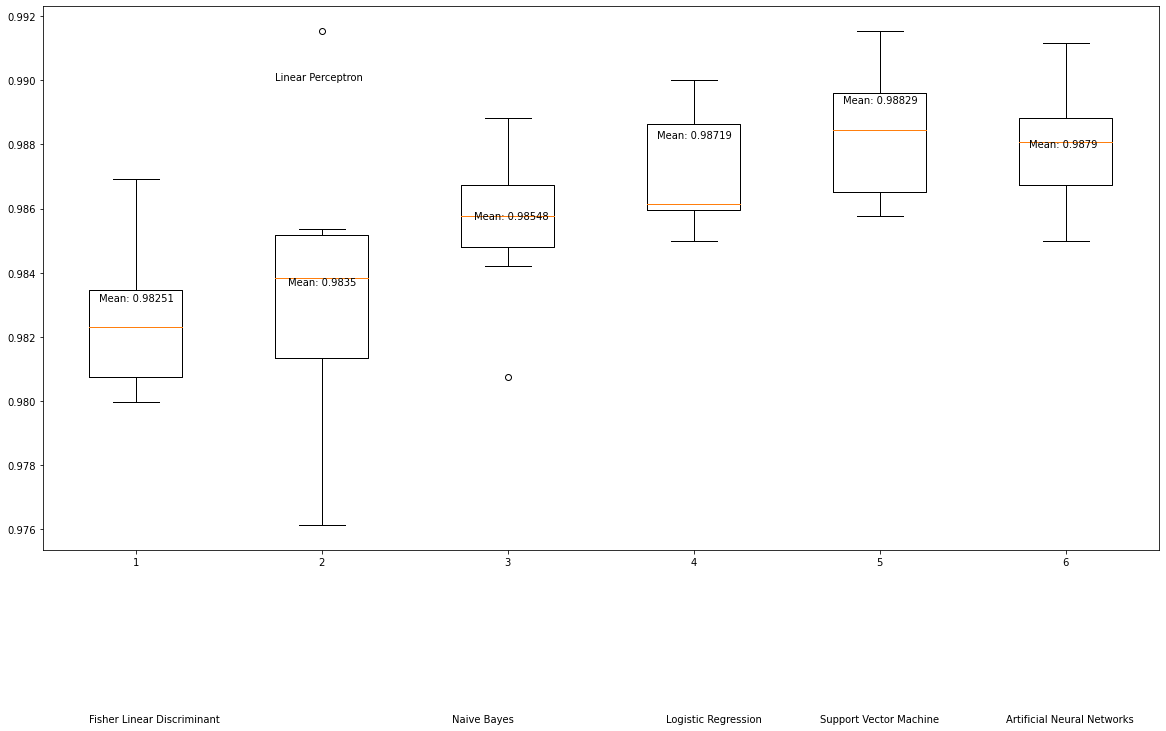

In [13]:
fig = plt.figure(figsize = (20, 10))
plt.boxplot([accuracy_fl_test, accuracy_lp_test, accuracy_nb_test, accuracy_log_test, accuracy_svm_test, accuracy_ann_test])

plt.text(0.75, 0.97, "Fisher Linear Discriminant")
plt.text(0.80, statistics.mean(accuracy_fl_test) + 0.0006, "Mean: " + str(round(statistics.mean(accuracy_fl_test), 5)))

plt.text(1.75, 0.99, "Linear Perceptron")
plt.text(1.82, statistics.mean(accuracy_lp_test) + 0.0001, "Mean: " + str(round(statistics.mean(accuracy_lp_test), 5)))

plt.text(2.70, 0.97, "Naive Bayes")
plt.text(2.82, statistics.mean(accuracy_nb_test) + 0.0002, "Mean: " + str(round(statistics.mean(accuracy_nb_test), 5)))

plt.text(3.85, 0.97, "Logistic Regression")
plt.text(3.80, statistics.mean(accuracy_log_test) + 0.001, "Mean: " + str(round(statistics.mean(accuracy_log_test), 5)))

plt.text(4.68, 0.97, "Support Vector Machine")
plt.text(4.80, statistics.mean(accuracy_svm_test) + 0.001, "Mean: " + str(round(statistics.mean(accuracy_svm_test), 5)))

plt.text(5.68, 0.97, "Artificial Neural Networks")
plt.text(5.80, statistics.mean(accuracy_ann_test), "Mean: " + str(round(statistics.mean(accuracy_ann_test), 5)))

#plt.savefig("boxPlot.jpeg")

plt.show() 